In [52]:
# magic lines that avoid re-start
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pybamm;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
font = {'family' : 'Times New Roman','size'   : fs}
mpl.rc('font', **font)

In [54]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import *
# Path and save to excel
#BasicPath=os.getcwd() # for HPC
BasicPath = "D:/OneDrive - Imperial College London/SimDataSave/P3R13/Paper/"  #'D:/OneDrive - Imperial College London/SimDataSave/P3R13/'; 
Target  = 'Rerun_single_consumed/' 
if not os.path.exists(BasicPath + Target):
   os.mkdir(BasicPath + Target)

In [55]:
# define parameter of double and single 
Para_dict_Same = {
   ################################# Same for single and double:
   "Total ageing cycles":[1000,],
   "SaveAsList":[  [50,5,1,1,1,1],  ],
   "Ageing temperature":[25,],
   "Mesh list":[ [10,5,10,60,30], ],   # Simon uses 30
   "Para_Set":[ "Li2023_ECdrag",],
   # solvent diffusion parameters:
   "EC initial concentration in electrolyte [mol.m-3]":[3500],
   "Typical EC concentration [mol.m-3]":[3500,],

   "Negative electrode porosity":[0.240507],
   "SEI resistivity [Ohm.m]":[2e5,],
   "Initial inner SEI thickness [m]":[1.2362e-08,],
   "Initial outer SEI thickness [m]":[1.2362e-08,],
   "Contact resistance [Ohm]":[6e-3],
   "Cation transference number":[
    "electrolyte_transference_number_EC_EMC_3_7_Landesfeind2019_Con"],
   "Electrolyte conductivity [S.m-1]":[
    "electrolyte_conductivity_EC_EMC_3_7_Landesfeind2019_Con"],
   "Electrolyte diffusivity [m2.s-1]":[
    "electrolyte_diffusivity_EC_EMC_3_7_Landesfeind2019_Con"],
   # SEI
   "Inner SEI lithium interstitial diffusivity [m2.s-1]":[5e-19,], 
   # 6e-18: j_SEI=6mA/m2;   3e-17, j=20mA/m2
   "Initial Neg SOC":[0.8841301667966484,],
   "Initial Pos SOC":[0.23552755074598045,],
}

Para_dict_DD_ONLY = {
    "Model option":[{
        "calculate discharge energy":"true",
        "SEI":"interstitial-diffusion limited",            
        "SEI film resistance":"distributed",          
        "SEI porosity change":"true",   
        "solvent diffusion": "double spatial consume w refill",#double no consume wo refill
        "electrolyte conductivity": "sol full"  ,
        "contact resistance":"true",  
        },],
    ################################# Need to be different between single and double:
    "EC Lithium ion cross diffusivity [m2.s-1]":[
        "Cross_diffusivity_1p5E_12",], # 
    "EC diffusivity in electrolyte [m2.s-1]":[
        "EC_diffusivity_5E_5"],
    "EC transference number":["EC_transference_number",],
    "Measured dLJP_dcEC": ["dLJP_Two_Species_dco_Jung2023",],
    "Measured dLJP_dce": ["dLJP_Two_Species_dce_Jung2023",],
}

Para_dict_DD = {**Para_dict_Same,**Para_dict_DD_ONLY}

Para_DD = []
recursive_scan(Para_DD,Para_dict_DD, list(Para_dict_DD.keys()), {})
print(len(Para_DD))
Para_dict_list = Para_DD
# sequence: single; double high, double low!
print(f"Total scan case is {len(Para_dict_list)}")


1
Total scan case is 1


In [56]:
keys_loc_AGE = [ # MAY WANT TO SELECT AGEING CYCLE later
    # Default output:
    "x [m]",
    "x_n [m]",
    "x_s [m]",
    "x_p [m]",
    # default: end; 
    "CCend Negative electrode porosity",
    "CCend Positive electrode potential [V]",
    "CCend Negative electrode interfacial current density [A.m-2]",
    "CCend Electrolyte potential [V]",
    "CCend Electrolyte concentration [mol.m-3]",
    "CCend EC concentration [mol.m-3]",
    "CCend EC transference number",
    "CCend c(EC) over c(Li+)",
    "CCend Electrolyte current density [A.m-2]",
    "CCend Electrolyte diffusivity [m2.s-1]",
    "CCend Electrolyte conductivity [S.m-1]",
    "CCend Negative electrode SEI interfacial current density [A.m-2]",

    "CDend Negative electrode porosity",
    "CDend Positive electrode potential [V]",
    "CDend Negative electrode interfacial current density [A.m-2]",
    "CDend Electrolyte potential [V]",
    "CDend Electrolyte concentration [mol.m-3]",
    "CDend EC concentration [mol.m-3]",
    "CDend EC transference number",
    "CDend c(EC) over c(Li+)",
    "CDend Electrolyte current density [A.m-2]",
    "CDend Electrolyte diffusivity [m2.s-1]",
    "CDend Electrolyte conductivity [S.m-1]",
    "CDend Negative electrode SEI interfacial current density [A.m-2]",
]
keys_tim_AGE = [
    # default: CD
    "CD Time [h]",
    "CC Time [h]",
    "CV Time [h]",
    "CD Terminal voltage [V]",
    "CC Terminal voltage [V]",
    "CV Terminal voltage [V]",
    "CD X-averaged battery reaction overpotential [V]",
    "CD X-averaged battery concentration overpotential [V]",
    "CD X-averaged EC concentration overpotential [V]", 
    "CD X-averaged battery electrolyte ohmic losses [V]",
    "CD X-averaged battery solid phase ohmic losses [V]",
    "CD X-averaged SEI interfacial current density [A.m-2]",
    "CC X-averaged battery reaction overpotential [V]",
    "CC X-averaged battery concentration overpotential [V]",
    "CC X-averaged EC concentration overpotential [V]", 
    "CC X-averaged battery electrolyte ohmic losses [V]",
    "CC X-averaged battery solid phase ohmic losses [V]",
    "CC X-averaged SEI interfacial current density [A.m-2]",
]
keys_cyc_AGE = [   # default: CDend
    "Discharge capacity [A.h]",
    "CCsta Discharge capacity [A.h]",
    "CCend Discharge capacity [A.h]",
    "CVsta Discharge capacity [A.h]",
    "CVend Discharge capacity [A.h]",
    "CDsta Loss of capacity to SEI [A.h]",
    "CDend Loss of capacity to SEI [A.h]",
    "CCsta Loss of capacity to SEI [A.h]",
    "CCend Loss of capacity to SEI [A.h]",
    "CVsta Loss of capacity to SEI [A.h]",
    "CVend Loss of capacity to SEI [A.h]",
    "CDend Local ECM resistance [Ohm]",
    "CDsta Negative electrode SOC", 
    "CDend Negative electrode SOC",
    "CDsta Positive electrode SOC", 
    "CDend Positive electrode SOC",
    "CDend Negative electrode capacity [A.h]",
    "CDend Positive electrode capacity [A.h]",
    "CDend Loss of active material in positive electrode [%]",
    "CDend Loss of active material in negative electrode [%]",
    "CDend Total EC in electrolyte [mol]",
    "CDend Total EC in electrolyte and SEI [mol]",
    "CDend Total lithium in electrolyte [mol]",
    "CDend Total lithium in particles [mol]",
]
keys_all_AGE = [keys_loc_AGE,keys_tim_AGE,keys_cyc_AGE];


In [57]:
# define experiments and scan!
V_max = 4.2;        V_min = 2.5; 
exp_AGE = [
   (f"Discharge at 1 C until {V_min} V", 
   f"Charge at 1 C until {V_max} V",  # (5 minute period)
   f"Hold at {V_max} V until C/20"),  ]# (5 minute period)
exp_AGE_2 = [
   (f"Discharge at 1 C until {V_min} V (5 seconds period)", 
   f"Charge at 1 C until {V_max} V (5 seconds period)", 
   f"Hold at {V_max} V until C/20 (5 seconds period)"),]
# step index for ageing
exp_AGE_CD = [ (
   f"Discharge at 1 C until {V_min} V (1 seconds period)",   ) ]
exp_AGE_CC = [ (
   f"Charge at 1 C until {V_max} V (1 seconds period)" ) ]
exp_AGE_CV = [ (
   f"Hold at {V_max} V until C/20 (1 seconds period)" ) ]
step_AGE_CD =0;   step_AGE_CC =1;   step_AGE_CV =2;

Exp_AGE_List     = [
    exp_AGE,exp_AGE,exp_AGE_2,
    exp_AGE_CD,exp_AGE_CC,exp_AGE_CV];
cycle_no = -1; 
exp_index_pack = [
   cycle_no,step_AGE_CD,
   step_AGE_CC,step_AGE_CV,];

book_name_xlsx = 'Landes_int.xlsx';sheet_name_xlsx = 'Results';
Path_pack = [BasicPath,Target,book_name_xlsx,sheet_name_xlsx,];
# Write the head for excel file:
head_list = list(Para_dict_list[0].keys())
head_list.insert(0,"Index");
head_list.extend([ "exp_AGE_text", 
   "Cap Loss","LLI to SEI",
   "LAM to Neg","LAM to Pos",
   "Error"])
Values_1 = [head_list,];
index_list = np.arange(1,len(Para_dict_list)+1,1)
for Scan_i,Para_dict_i in zip(index_list,Para_dict_list):
    value_list_temp = list(Para_dict_i.values())
    values = []
    for value_list_temp_i in value_list_temp:
        values.append(str(value_list_temp_i))
    values.insert(0,str(Scan_i))
    Values_1.append(values)
write_excel_xlsx(
    BasicPath + Target+book_name_xlsx, 
    sheet_name_xlsx, Values_1)   

Successfully create a excel file


# Start debug

In [58]:
Para_dict_i = Para_dict_list[0]
Index = np.arange(1,len(Para_dict_list)+1).tolist()  
index_i     = Index[0]
count_i = int(index_i);
print('Start Now! Scan %d.' % count_i)  

# Un-pack data:
[cycle_no,step_AGE_CD,
    step_AGE_CC,step_AGE_CV, ] = exp_index_pack
[exp_AGE,exp_AGE,exp_AGE_2, # seems not used but actually used!
    exp_AGE_CD,exp_AGE_CC,exp_AGE_CV] = Exp_AGE_List
[BasicPath,Target,
    book_name_xlsx,sheet_name_xlsx,] = Path_pack

##### Initialise Para_0 and model 
CyclePack,Para_0 = Para_init(Para_dict_i)
[Total_Cycles,SaveAsList,Mesh_list,
    Temper_i,model_options] = CyclePack
model = pybamm.lithium_ion.DFN(options=model_options)

Start Now! Scan 1.
Confirm: using interstitial-diffusion limited


In [59]:
print(Para_0["EC diffusivity in electrolyte [m2.s-1]"])
print(Para_0["Typical EC diffusivity in electrolyte [m2.s-1]"])
exp_i = [(
          "Hold at 4.2V until C/100", 
          "Rest for 1 hour",
          ),  ]
exp = pybamm.Experiment( exp_i * 1  ) 
var_pts = {
    "x_n": Mesh_list[0],  # negative electrode
    "x_s": Mesh_list[1],  # separator 
    "x_p": Mesh_list[2],  # positive electrode
    "r_n": Mesh_list[3],  # negative particle
    "r_p": Mesh_list[4],  # positive particle
    }  
# 
sim_0    = pybamm.Simulation(
    model,experiment = exp,
    parameter_values = Para_0,
    solver = pybamm.CasadiSolver(),
    #var_pts=var_pts,
    ) 
sol_0    = sim_0.solve( calc_esoh=False,)

<function EC_diffusivity_5E_5 at 0x000001E3C52AECA0>
5e-10


In [60]:
print(sol_0["Negative electrode SOC"].entries[-1])
print(sol_0["Positive electrode SOC"].entries[-1])

0.8841880777172995
0.23545507825931614


In [61]:
sol_0["EC concentration [mol.m-3]"].entries
sol_0["Negative electrode porosity"].entries

array([[0.240507  , 0.24050665, 0.24050599, ..., 0.24046789, 0.24046723,
        0.24046656],
       [0.240507  , 0.24050665, 0.24050599, ..., 0.24046789, 0.24046723,
        0.24046656],
       [0.240507  , 0.24050665, 0.24050599, ..., 0.24046789, 0.24046723,
        0.24046656],
       ...,
       [0.240507  , 0.24050665, 0.24050598, ..., 0.24046789, 0.24046722,
        0.24046655],
       [0.240507  , 0.24050665, 0.24050598, ..., 0.24046789, 0.24046722,
        0.24046655],
       [0.240507  , 0.24050665, 0.24050598, ..., 0.24046789, 0.24046722,
        0.24046655]])

In [62]:
label = ["0",] 
output_variables3 = [
    "Negative electrode SOC",
    "Positive electrode SOC",
    "Negative electrode porosity",
    "Electrolyte potential [V]",
    "Electrolyte concentration [mol.m-3]",
    "EC concentration [mol.m-3]",
    "Positive current collector potential [V]", 
    "Terminal voltage [V]", ]
quick_plot = pybamm.QuickPlot(
    [sol_0,], output_variables3,label,variable_limits='fixed',
    time_unit='hours',n_rows=2) #figsize = (18,12),
quick_plot.dynamic_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0084935364005718, step=0.01008493536400571…

# Normal code

Start Now! Scan 1.
Confirm: using interstitial-diffusion limited
try to run 50 cycles


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
2023-04-20 11:33:17.189 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.


Failed or took too long, shorten cycles
Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.
try to run 5 cycles


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
2023-04-20 11:34:07.852 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.


Failed or took too long, shorten cycles
Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.
try to run 1 cycles


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
2023-04-20 11:34:57.673 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.


Failed or took too long, shorten cycles
Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.
try to run 1 cycles


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
2023-04-20 11:35:16.126 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.


Failed or took too long, shorten cycles
Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.
try to run 1 cycles
Failed or took too long, shorten cycles
Step 'Charge at 1 C until 4.2 V (1 seconds period)' is infeasible due to exceeded bounds at initial conditions. If this step is part of a longer cycle, round brackets should be used to indicate this, e.g.:
 pybamm.Experiment([(
	Discharge at C/5 for 10 hours or until 3.3 V,
	Charge at 1 A until 4.1 V,
	Hold at 4.1 V until 10 mA
])
try to run 1 cycles


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
2023-04-20 11:35:50.529 - [ERROR] callbacks.on_experiment_error(226): Simulation error: Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.


Failed or took too long, shorten cycles
Maximum number of decreased steps occurred at t=0.0 (final SolverError: '.../casadi/interfaces/sundials/idas_interface.cpp:591: IDACalcIC returned "IDA_CONV_FAIL". Consult IDAS documentation.'). For a full solution try reducing dt_max (currently, dt_max=111.44905869391971) and/or reducing the size of the time steps or period of the experiment. Set `return_solution_if_failed_early=True` to return the solution object up to the point where failure occured.
Exit as no options left
Finally finish 0 cycles
No single step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Something went wrong during plotting Fig. 1~3 for scan 1
Something went wrong during saving .mat for scan 1


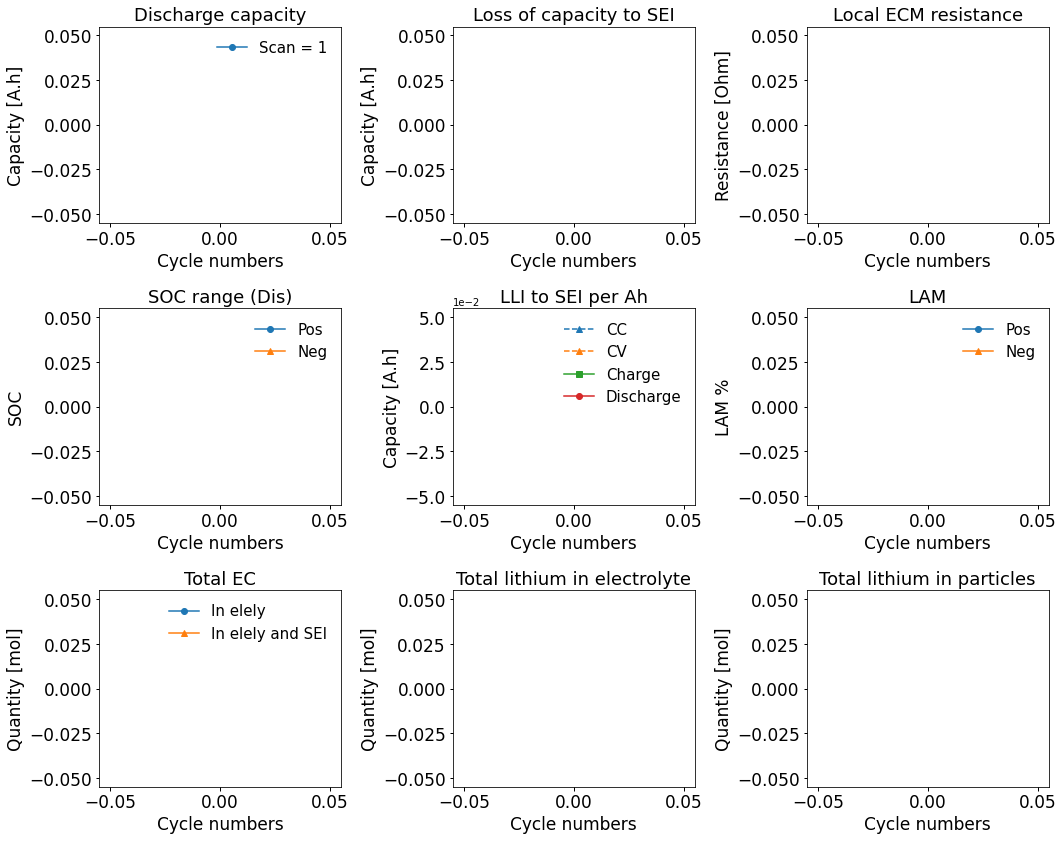

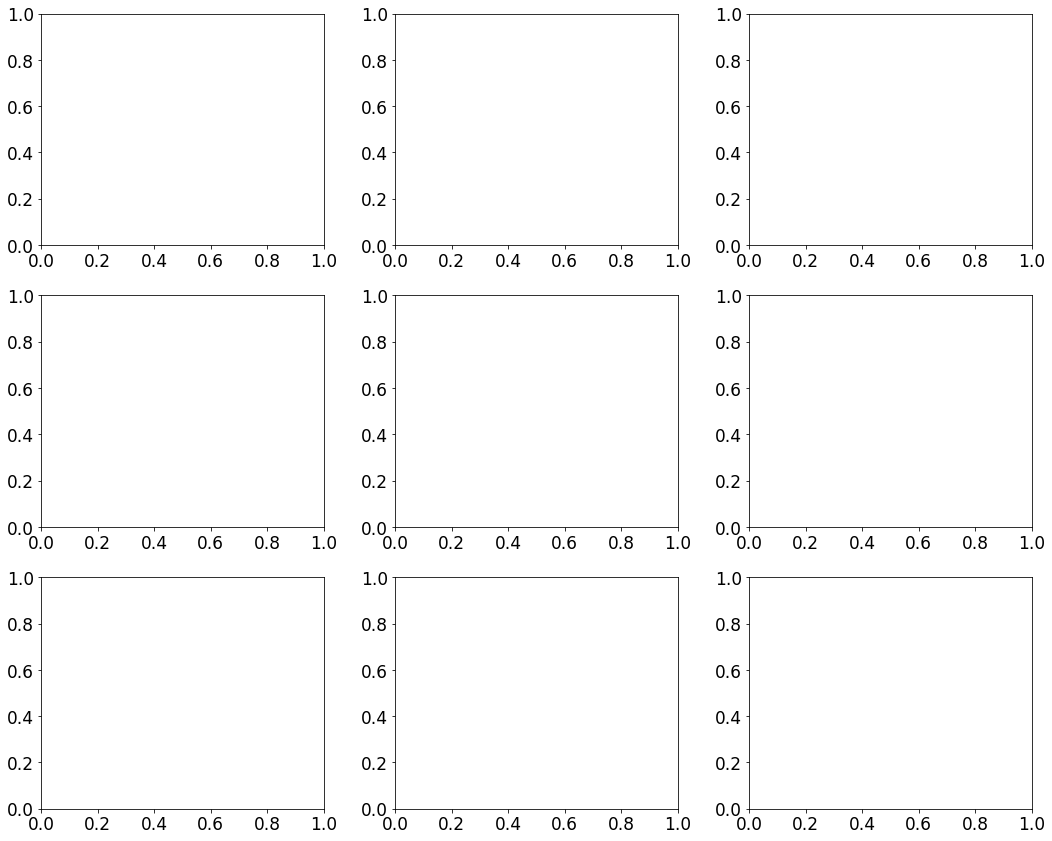

In [7]:
Results = []; Index = np.arange(1,len(Para_dict_list)+1).tolist()  
for Para_dict_i,index_i in zip(Para_dict_list,Index):
    Sol_all_i,j,midc_merge = Run_P3_model(
        index_i, Para_dict_i,   Path_pack , 
        keys_all_AGE,   Exp_AGE_List, exp_index_pack 
        ) 
    Results.append([Sol_all_i,j,midc_merge])


In [ ]:
# Write all seperate excel files into a big file:
for i in Index:
    old_book = str(i) + '_' + book_name_xlsx
    #print(old_book)
    #open excel:
    try:   # use try just in case some cases fail
        data_old = openpyxl.load_workbook(BasicPath + Target + old_book)   
        data_tar = openpyxl.load_workbook(BasicPath + Target + book_name_xlsx) 

        table_old = data_old[str(i)]
        nrows_old = table_old.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数

        tar_sheet_name_xlsx = 'Results';
        table_tar = data_tar[tar_sheet_name_xlsx]
        nrows_tar = table_tar.max_row  # 获得行数
        ncolumns_old = table_old.max_column  # 获得列数
        list_old = [];
        #print(nrows_old,nrows_tar)
        for i in range(1,nrows_old+1):
            for j in range(1,ncolumns_old+1):
                list_old.append(table_old.cell(row=i,column=j).value)

        list_old = [list_old,]
        for i in range(1, len(list_old)+1):
                for j in range(1, len(list_old[i-1])+1):
                    #print(i,j,list_old[i-1][j-1]    )
                    table_tar.cell(nrows_tar+i, j).value = list_old[i-1][j-1]     
        data_tar.save(BasicPath + Target + book_name_xlsx) 
        data_tar.close()
    except:
        print(f"Something goes wrong for Scan {i}!")
    else:
        print(f"Successfuly write results for Scan {i}!") 

Successfuly write results for Scan 1!
Successfuly write results for Scan 1!
Successfuly write results for Scan 1!
